# **Shipment Data Analysis Project**

# Importing Libraries and Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv("Shipment_Dataset.csv") 
df.head()

,Shipment ID,Company Name,Source Location,Destination Location,Source Latitude,Source Longitude,Destination Latitude,Destination Longitude,Distance (km),Category,...,Shipment Priority,Shipment Mode,Fragile,Customer Rating,Expected Delivery Time (hrs),Actual Delivery Time (hrs),Delay (hrs),Date of Shipment,Status,Payment Method
0,SHP100000,DHL,Mumbai,Delhi,19.0760,72.8777,28.6139,77.2090,1186.17,Apparel,...,Express,Air,True,5,19.77,55.67,92.96,2023-05-11,Delivered,Prepaid
1,SHP100001,BlueDart,Jaipur,Ahmedabad,26.9124,75.7873,23.0225,72.5714,159.70,Electronics,...,Normal,Air,True,4,2.66,142.45,47.48,2023-02-28,Delivered,COD
2,SHP100002,Delhivery,Kolkata,Chennai,22.5726,88.3639,13.0827,80.2707,1259.60,Documents,...,Normal,Road,True,2,20.99,NaN,66.26,2023-11-03,Returned,Prepaid
3,SHP100003,UPS,Hyderabad,Mumbai,17.3850,78.4867,19.0760,72.8777,2072.89,Medicines,...,Express,Road,True,5,34.55,49.20,87.76,2023-09-21,In-Transit,Prepaid
4,SHP100004,FedEx,Pune,Ahmedabad,18.5204,73.8567,23.0225,72.5714,199.73,Medicines,...,Normal,Road,False,2,3.33,99.39,85.70,2023-02-13,Delayed,COD


# Understanding Dataset

In [3]:
print(df.shape)

(50000, 28)


In [4]:
print(df.columns)

Index(['Shipment ID', 'Company Name', 'Source Location',
       'Destination Location', 'Source Latitude', 'Source Longitude',
       'Destination Latitude', 'Destination Longitude', 'Distance (km)',
       'Category', 'No. of Items', 'Package Weight (kg)',
       'Package Volume (cc)', 'Package Cost (in Rs.)',
       'Shipment Cost (in Rs.)', 'Insurance Cost (in Rs.)',
       'Total Cost (in Rs.)', 'Profit (in Rs.)', 'Shipment Priority',
       'Shipment Mode', 'Fragile', 'Customer Rating',
       'Expected Delivery Time (hrs)', 'Actual Delivery Time (hrs)',
       'Delay (hrs)', 'Date of Shipment', 'Status', 'Payment Method'],
      dtype='object')


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Shipment ID                   50000 non-null  object 
 1   Company Name                  50000 non-null  object 
 2   Source Location               50000 non-null  object 
 3   Destination Location          50000 non-null  object 
 4   Source Latitude               50000 non-null  float64
 5   Source Longitude              50000 non-null  float64
 6   Destination Latitude          50000 non-null  float64
 7   Destination Longitude         50000 non-null  float64
 8   Distance (km)                 50000 non-null  float64
 9   Category                      50000 non-null  object 
 10  No. of Items                  50000 non-null  int64  
 11  Package Weight (kg)           50000 non-null  float64
 12  Package Volume (cc)           50000 non-null  float64
 13  P

In [7]:
df.describe()

,Source Latitude,Source Longitude,Destination Latitude,Destination Longitude,Distance (km),No. of Items,Package Weight (kg),Package Volume (cc),Package Cost (in Rs.),Shipment Cost (in Rs.),Insurance Cost (in Rs.),Total Cost (in Rs.),Profit (in Rs.),Customer Rating,Expected Delivery Time (hrs),Actual Delivery Time (hrs),Delay (hrs)
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,44996.000000,45046.000000,50000.000000,40563.000000,40563.000000,50000.000000,50000.000000,45014.000000,45202.000000
mean,20.859225,77.795395,20.877651,77.751550,1550.671898,10.506220,25.327116,49820.518000,1159.881833,1073.527065,23.180458,2289.259180,195.401134,3.006060,25.844529,77.504266,51.593610
std,5.329475,4.460004,5.332474,4.448443,837.310804,5.771179,14.279731,28860.167671,586.638045,347.692523,11.712860,682.653303,62.909269,1.413231,13.955188,32.473524,29.318315
min,12.971600,72.571400,12.971600,72.571400,100.010000,1.000000,0.500000,100.230000,128.220000,387.500000,2.560000,791.483612,25.891425,1.000000,1.670000,1.670000,0.000000
25%,17.385000,73.856700,17.385000,73.856700,826.477500,5.000000,13.000000,24785.270000,678.660000,789.695000,13.570000,1771.545742,148.756982,2.000000,13.770000,53.082500,29.300000
50%,19.076000,77.594600,19.076000,77.209000,1551.615000,10.000000,25.465000,49795.555000,1013.805000,1053.155000,20.270000,2210.759402,189.013325,3.000000,25.860000,78.850000,53.085000
75%,26.846700,80.270700,26.846700,80.270700,2274.600000,16.000000,37.700000,74834.247500,1573.440000,1319.077500,31.440000,2736.608060,236.723347,4.000000,37.910000,102.380000,76.510000
max,28.613900,88.363900,28.613900,88.363900,2999.950000,20.000000,50.000000,99999.930000,3378.490000,2026.500000,67.570000,5225.920762,475.260062,5.000000,50.000000,149.740000,100.000000


# Missing and Duplicate Values

In [6]:
print("Missing Values:\n", df.isnull().sum())
print("\nDuplicate Rows:", df.duplicated().sum())

Missing Values:
 Shipment ID                        0
Company Name                       0
Source Location                    0
Destination Location               0
Source Latitude                    0
Source Longitude                   0
Destination Latitude               0
Destination Longitude              0
Distance (km)                      0
Category                           0
No. of Items                       0
Package Weight (kg)                0
Package Volume (cc)                0
Package Cost (in Rs.)           5004
Shipment Cost (in Rs.)          4954
Insurance Cost (in Rs.)            0
Total Cost (in Rs.)             9437
Profit (in Rs.)                 9437
Shipment Priority                  0
Shipment Mode                      0
Fragile                            0
Customer Rating                    0
Expected Delivery Time (hrs)       0
Actual Delivery Time (hrs)      4986
Delay (hrs)                     4798
Date of Shipment                   0
Status               

#### Key columns like Package Cost, Shipment Cost, Total Cost, Profit and Delay have missing values but no duplicate values 

# Summary of Dataset

# 1. Exploratory Data Analysis (EDA) 

## A. Initial Data Cleaning:

### Handling Missing Values

In [7]:
df['Package Cost (in Rs.)'].fillna(df['Package Cost (in Rs.)'].median(), inplace=True)
df['Shipment Cost (in Rs.)'].fillna(df['Shipment Cost (in Rs.)'].median(), inplace=True)
df['Actual Delivery Time (hrs)'].fillna(df['Actual Delivery Time (hrs)'].median(), inplace=True)
df['Delay (hrs)'].fillna(df['Delay (hrs)'].median(), inplace=True)

df.dropna(subset=['Total Cost (in Rs.)', 'Profit (in Rs.)'], inplace=True)

df.isnull().sum().sum()

0

### Converting and Deriving new columns 

In [8]:
df['Date of Shipment'] = pd.to_datetime(df['Date of Shipment'])

In [9]:
df['Shipping Duration (hrs)'] = df['Actual Delivery Time (hrs)'] - df['Expected Delivery Time (hrs)']

In [10]:
df['Profit_per_Shipment'] = df['Profit (in Rs.)'] / df['No. of Items']

In [11]:
df['Cost_to_Package_Ratio'] = df['Shipment Cost (in Rs.)'] / df['Package Cost (in Rs.)']

In [12]:
df['Is_COD'] = df['Payment Method'].apply(lambda x: 1 if x == 'Cash on Delivery' else 0)

## B. Univariate Analysis:

### 1. Shipment Cost

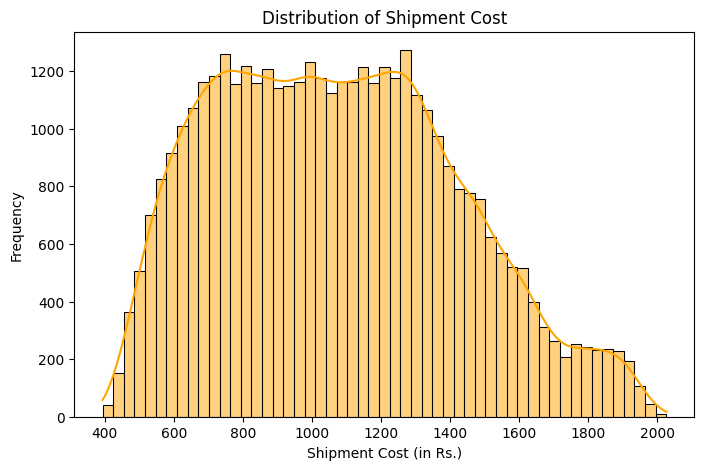

In [13]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Shipment Cost (in Rs.)'], kde=True, color='orange')
plt.title("Distribution of Shipment Cost")
plt.xlabel("Shipment Cost (in Rs.)")
plt.ylabel("Frequency")
plt.show()

#### Insight: Most shipments cost between 700–1300 Rs, with a right-skewed distribution indicating fewer high-cost shipments above 1300 Rs.

### 2. Cost & Profit

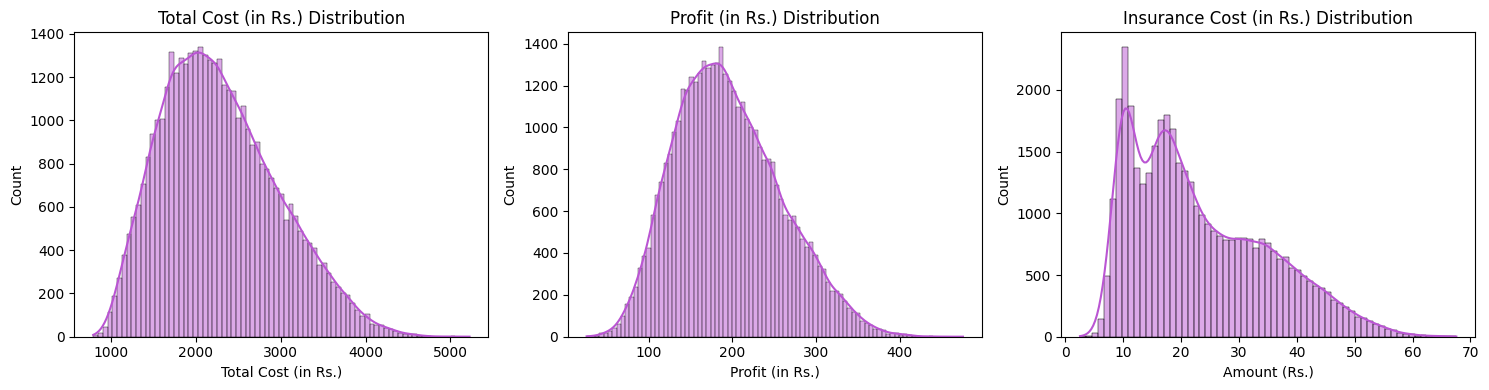

In [14]:
cost_cols = ['Total Cost (in Rs.)', 'Profit (in Rs.)', 'Insurance Cost (in Rs.)']

plt.figure(figsize=(15, 4))
for i, col in enumerate(cost_cols):
    plt.subplot(1, 3, i + 1)
    sns.histplot(df[col], kde=True, color='mediumorchid')
    plt.title(f"{col} Distribution")
plt.xlabel("Amount (Rs.)")
plt.tight_layout()
plt.show()

#### Insight: Total Cost: Most shipments cost between ₹1500 to ₹2500, with a peak around ₹2000.

#### Profit: Most profits are between ₹150 to ₹250, peaking near ₹200.

#### Insurance Cost: Most insurance costs are below ₹20, with a sharp peak around ₹10.

### 3. Top Source and Destination Locations

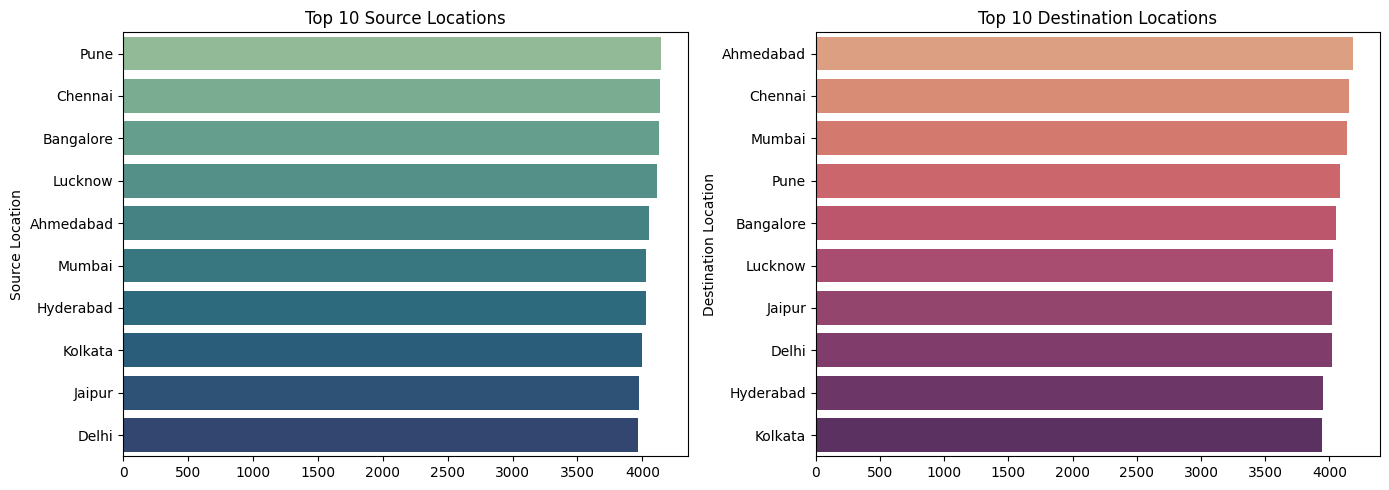

In [15]:
top_sources = df['Source Location'].value_counts().head(10)
top_destinations = df['Destination Location'].value_counts().head(10)

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
sns.barplot(y=top_sources.index, x=top_sources.values, palette='crest')
plt.title("Top 10 Source Locations")

plt.subplot(1, 2, 2)
sns.barplot(y=top_destinations.index, x=top_destinations.values, palette='flare')
plt.title("Top 10 Destination Locations")

plt.tight_layout()
plt.show()

#### Insight: **Pune** and Chennai send the most shipments, while Ahmedabad and Chennai receive the most, and many cities are common in both lists.

### 4. Ratings & Number of Items

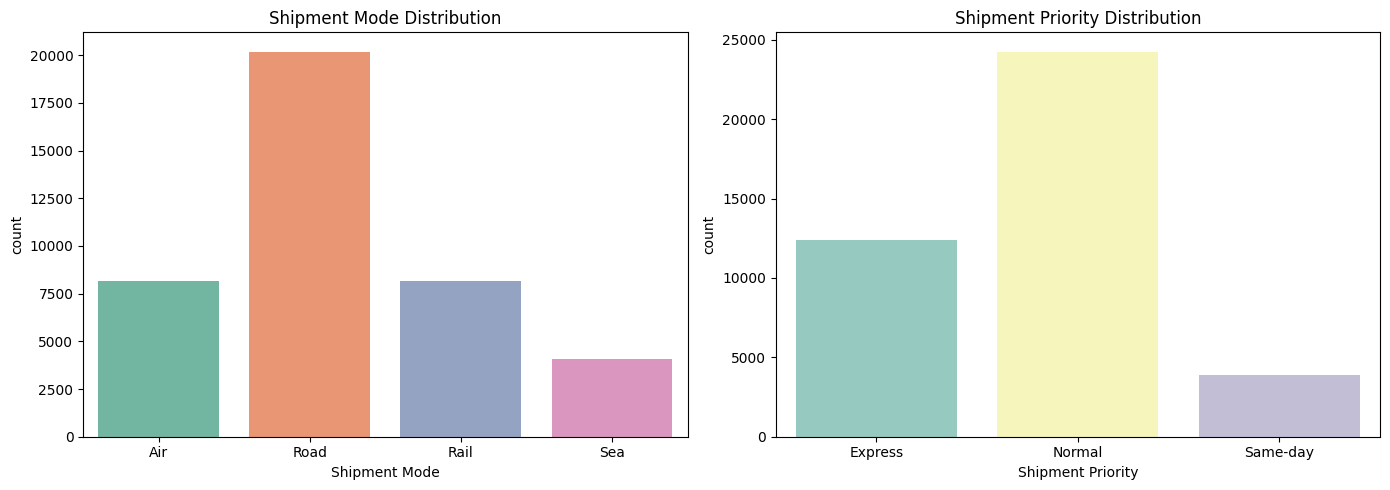

In [16]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
sns.countplot(data=df, x='Shipment Mode', palette='Set2')
plt.title("Shipment Mode Distribution")

plt.subplot(1, 2, 2)
sns.countplot(data=df, x='Shipment Priority', palette='Set3')
plt.title("Shipment Priority Distribution")

plt.tight_layout()
plt.show()

#### Insight: **Road** is the most used shipment mode with around **20,000 shipments**, while **Normal** priority is the most common with nearly **25,000 shipments**.

## C. Bivariate & Multivariate Analysis: 

### 1. Cost vs Distance 

<Figure size 1000x600 with 0 Axes>

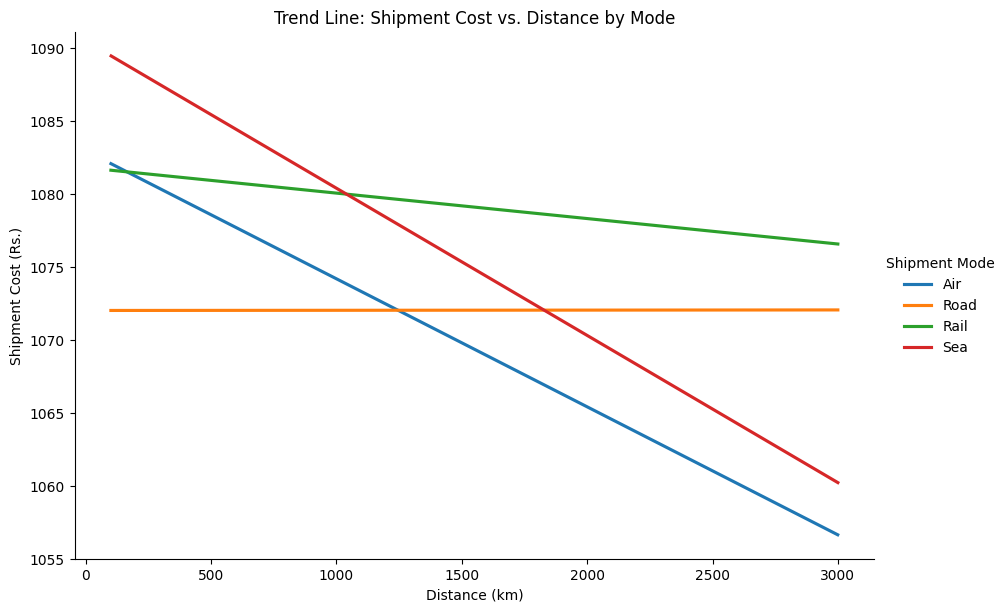

In [17]:
plt.figure(figsize=(10, 6))
sns.lmplot(data=df, x='Distance (km)', y='Shipment Cost (in Rs.)', hue='Shipment Mode',
           scatter=False, ci=None, height=6, aspect=1.5)
plt.title('Trend Line: Shipment Cost vs. Distance by Mode')
plt.xlabel('Distance (km)')
plt.ylabel('Shipment Cost (Rs.)')
plt.show()

#### Insight: As distance increases up to **3000 km**, **Air** and **Sea** shipment costs drop the most, while **Road** cost stays nearly constant.

### 2. Shipment Cost by Priority

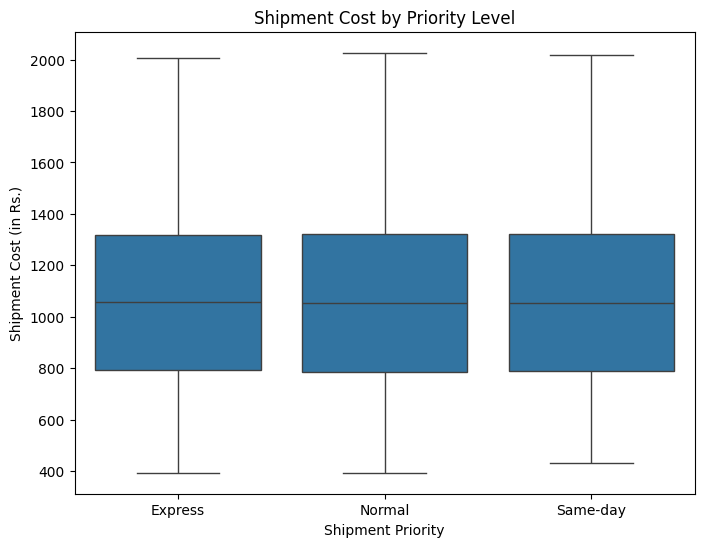

In [18]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Shipment Priority', y='Shipment Cost (in Rs.)')
plt.title('Shipment Cost by Priority Level')
plt.xlabel('Shipment Priority')
plt.ylabel('Shipment Cost (in Rs.)')
plt.show()

#### Insight: All three shipment priorities — **Express**, **Normal**, and **Same-day** — have almost the same shipment cost range, with a median around **₹1050**.

### 3. Mode vs Priority

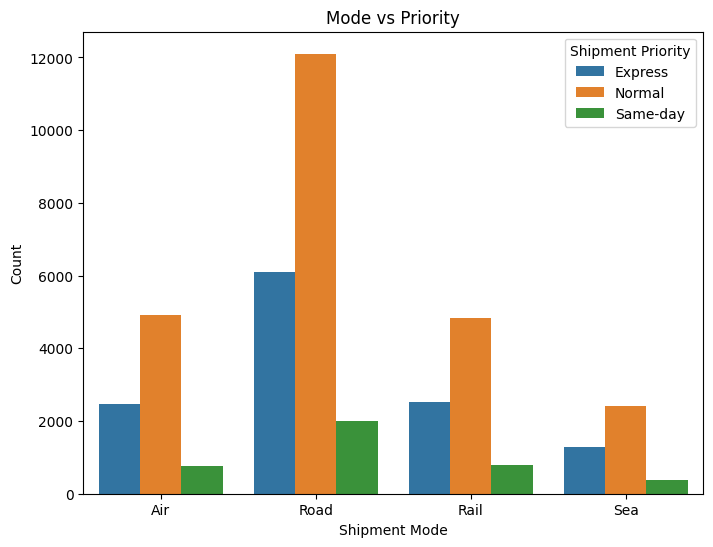

In [19]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Shipment Mode', hue='Shipment Priority')
plt.title('Mode vs Priority')
plt.xlabel('Shipment Mode')
plt.ylabel('Count')
plt.show()

#### Insight: **Road** is the most used mode across all priorities, especially for **Normal** shipments with over **12,000 deliveries**, while **Sea** and **Same-day** are the least used combination.

# 2. Feature Engineering

## A. Create New Features: 

In [20]:
df['Cost per km'] = df['Shipment Cost (in Rs.)'] / df['Distance (km)']
df['Cost per kg'] = df['Shipment Cost (in Rs.)'] / df['Package Weight (kg)']
df['Is Delayed'] = df['Delay (hrs)'] > 0

In [21]:
df['Is Delayed'] = df['Delay (hrs)'] > 0
df['Is Fragile & High Value'] = (df['Fragile'] == True) & (df['Package Cost (in Rs.)'] > 10000)

## B. Detecting Treatment: 

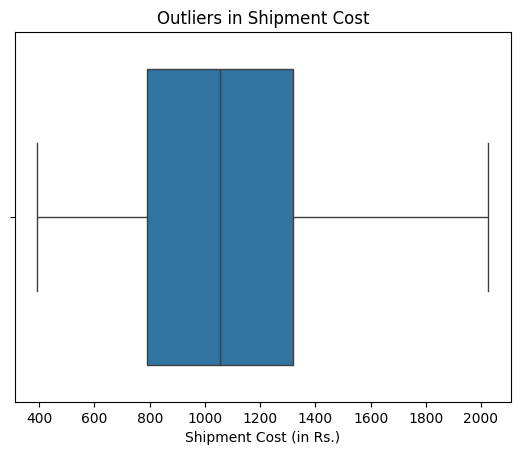

In [22]:
sns.boxplot(x=df['Shipment Cost (in Rs.)'])
plt.title("Outliers in Shipment Cost")
plt.show()

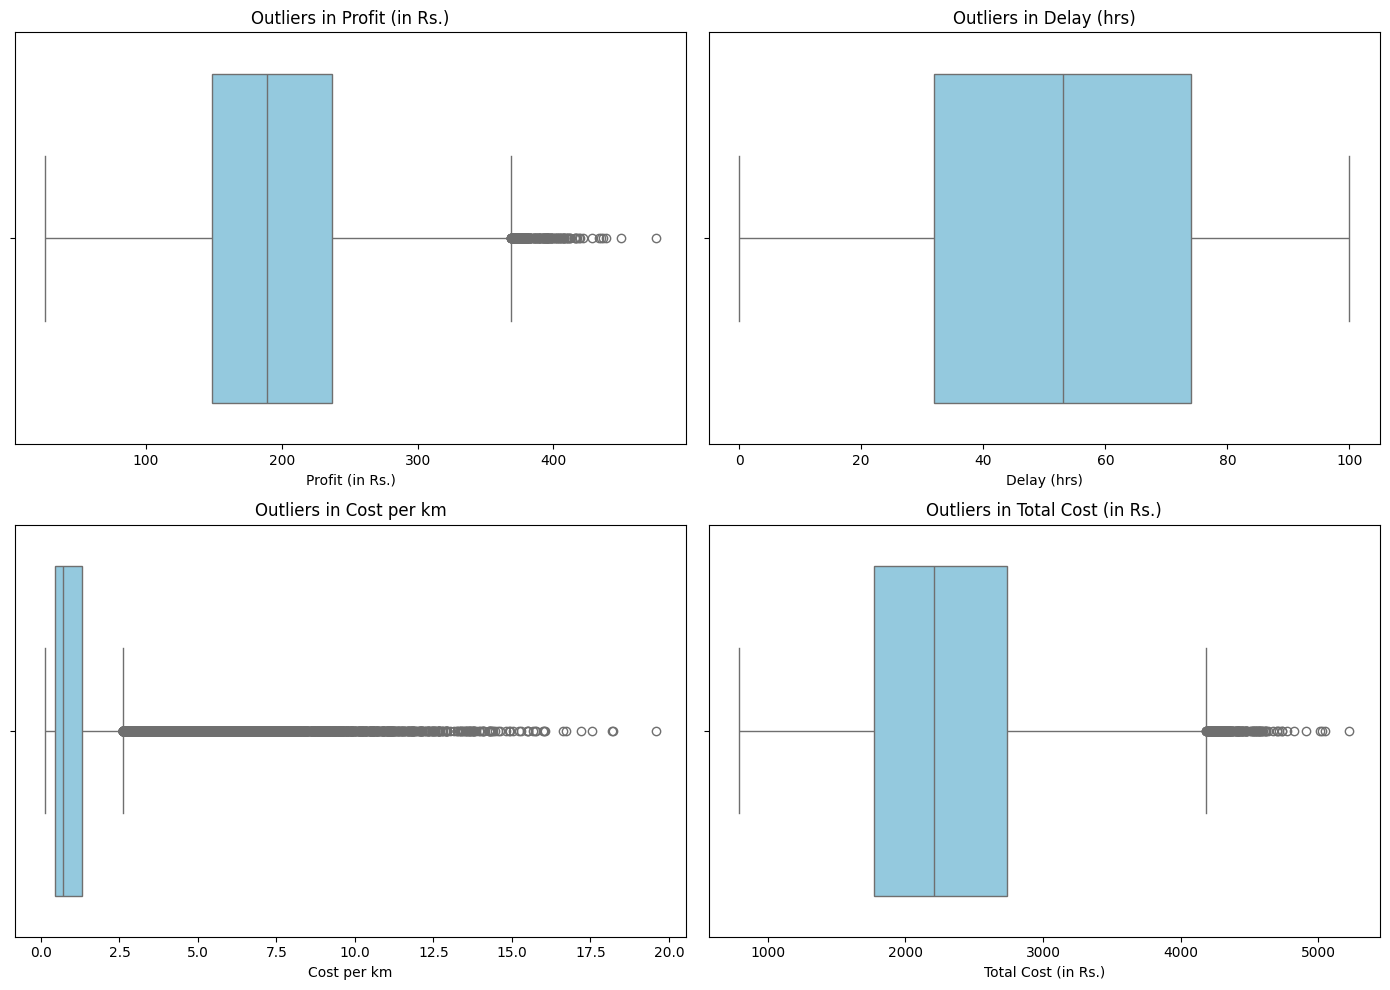

In [23]:
outlier_cols = ['Profit (in Rs.)', 'Delay (hrs)', 'Cost per km', 'Total Cost (in Rs.)']

plt.figure(figsize=(14, 10))

for i, col in enumerate(outlier_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f"Outliers in {col}")
    plt.xlabel(col)

plt.tight_layout()
plt.show()

#### Insight: Shipment Cost has a few outliers above ₹2000, while most values are between ₹700 and ₹1400.

#### Profit has visible outliers beyond ₹400, with most profits falling between ₹100 and ₹300.

#### Delay (hrs) is mostly between 30 to 90 hours, with minimal outliers.

#### Cost per km has extreme outliers beyond ₹15/km, while most values are under ₹2/km.

#### Total Cost has outliers above ₹4500, but most shipments cost between ₹1500 and ₹3500.

## C. Outlier Treatment: 

In [24]:
cols_to_clean = ['Shipment Cost (in Rs.)', 'Profit (in Rs.)', 'Delay (hrs)', 'Cost per km', 'Total Cost (in Rs.)']

for col in cols_to_clean:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    before = df.shape[0]
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    after = df.shape[0]
    
    print(f"{col}: Removed {before - after} outliers")


Shipment Cost (in Rs.): Removed 0 outliers
Profit (in Rs.): Removed 188 outliers
Delay (hrs): Removed 0 outliers
Cost per km: Removed 4346 outliers
Total Cost (in Rs.): Removed 100 outliers


## D. Encoding & Scaling: 

In [25]:
categorical_cols = ['Shipment Mode', 'Shipment Priority', 'Company Name']
df_encoded = pd.get_dummies(df, columns=categorical_cols)
print(df_encoded.head())  

  Shipment ID Source Location Destination Location  Source Latitude  \
0   SHP100000          Mumbai                Delhi          19.0760   
2   SHP100002         Kolkata              Chennai          22.5726   
5   SHP100005            Pune            Bangalore          18.5204   
6   SHP100006       Bangalore              Lucknow          12.9716   
7   SHP100007          Mumbai              Chennai          19.0760   

   Source Longitude  Destination Latitude  Destination Longitude  \
0           72.8777               28.6139                77.2090   
2           88.3639               13.0827                80.2707   
5           73.8567               12.9716                77.5946   
6           77.5946               26.8467                80.9462   
7           72.8777               13.0827                80.2707   

   Distance (km)     Category  No. of Items  ...  Shipment Mode_Road  \
0        1186.17      Apparel             9  ...               False   
2        1259.60    

In [26]:
numerical_cols = df_encoded.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])
print(df_encoded.head()) 

  Shipment ID Source Location Destination Location  Source Latitude  \
0   SHP100000          Mumbai                Delhi        -0.331582   
2   SHP100002         Kolkata              Chennai         0.323619   
5   SHP100005            Pune            Bangalore        -0.435692   
6   SHP100006       Bangalore              Lucknow        -1.475438   
7   SHP100007          Mumbai              Chennai        -0.331582   

   Source Longitude  Destination Latitude  Destination Longitude  \
0         -1.105422              1.452752              -0.119819   
2          2.366670             -1.462945               0.568691   
5         -0.885925             -1.483802              -0.033106   
6         -0.047867              1.120993               0.720597   
7         -1.105422             -1.462945               0.568691   

   Distance (km)     Category  No. of Items  ...  Shipment Mode_Road  \
0      -0.685211      Apparel     -0.261081  ...               False   
2      -0.587763    

# 3. Business Analysis 

## A. Business Questions to Explore:

### Q1.Which company is most cost-efficient per km? 

Company Name
UPS          0.795139
BlueDart     0.795843
FedEx        0.800625
Delhivery    0.802160
DHL          0.802499
Name: Cost per km, dtype: float64


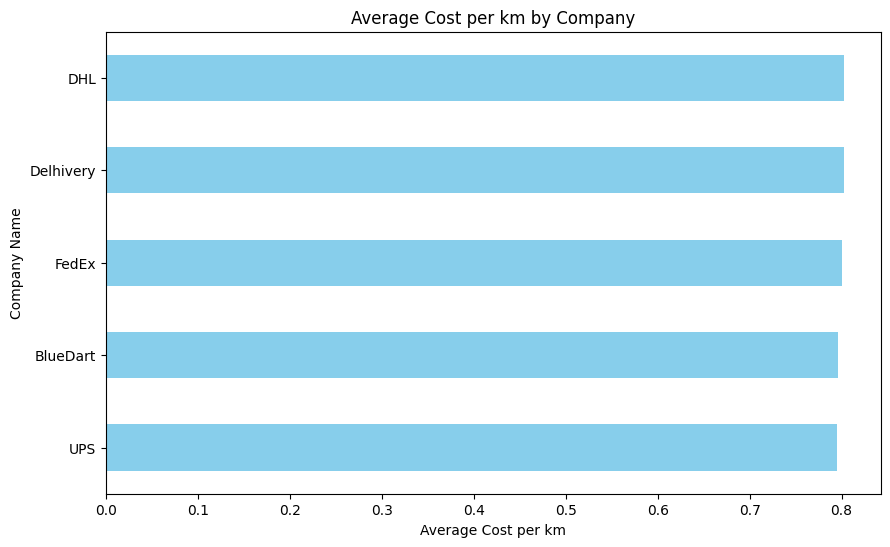

In [27]:
company_cost_eff = df.groupby('Company Name')['Cost per km'].mean().sort_values()
print(company_cost_eff)

company_cost_eff.plot(kind='barh', figsize=(10, 6), color='skyblue')
plt.title("Average Cost per km by Company")
plt.xlabel("Average Cost per km")
plt.ylabel("Company Name")
plt.show()

#### **UPS** is the most cost-efficient company per km.

### Q2. Which shipment modes are most delayed? 

Shipment Mode
Sea     52.633682
Rail    51.972048
Road    51.704291
Air     51.401758
Name: Delay (hrs), dtype: float64


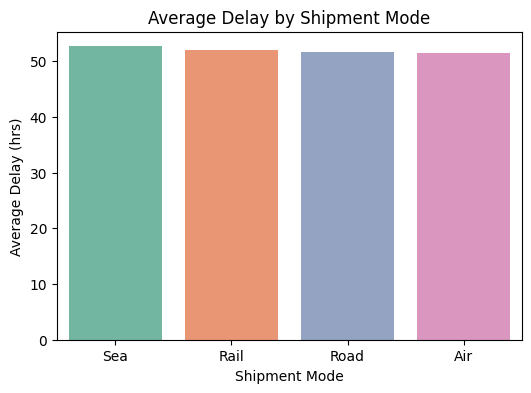

In [28]:
mode_delay = df.groupby('Shipment Mode')['Delay (hrs)'].mean().sort_values(ascending=False)
print(mode_delay)

plt.figure(figsize=(6, 4))
sns.barplot(x=mode_delay.index, y=mode_delay.values, palette='Set2')
plt.title("Average Delay by Shipment Mode")
plt.xlabel("Shipment Mode")
plt.ylabel("Average Delay (hrs)")
plt.show()

#### **Sea** mode has the highest average delay.

### Q3. Which product categories result in the most returns or delays?

Category
Apparel        0.504840
Furniture      0.504703
Electronics    0.499307
Documents      0.497049
Medicines      0.484382
Name: Is_Problem, dtype: float64


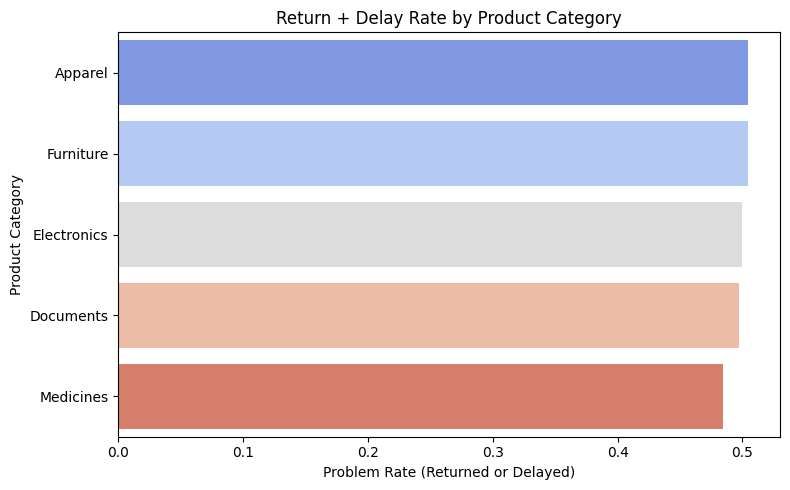

In [29]:
df['Is_Problem'] = df['Status'].apply(lambda x: 1 if x in ['Returned', 'Delayed'] else 0)
problem_rate = df.groupby('Category')['Is_Problem'].mean().sort_values(ascending=False)
print(problem_rate)

plt.figure(figsize=(8, 5))
sns.barplot(x=problem_rate.values, y=problem_rate.index, palette='coolwarm')
plt.title("Return + Delay Rate by Product Category")
plt.xlabel("Problem Rate (Returned or Delayed)")
plt.ylabel("Product Category")
plt.tight_layout()
plt.show()

#### **Apparel** has the highest return rate.

### Q4. Which regions have the highest logistic costs?

Source Location
Bangalore    3884807.66
Chennai      3856181.97
Pune         3849228.20
Lucknow      3801877.96
Ahmedabad    3785765.78
Hyderabad    3776289.22
Kolkata      3727797.99
Mumbai       3704783.56
Jaipur       3691019.92
Delhi        3682101.26
Name: Shipment Cost (in Rs.), dtype: float64


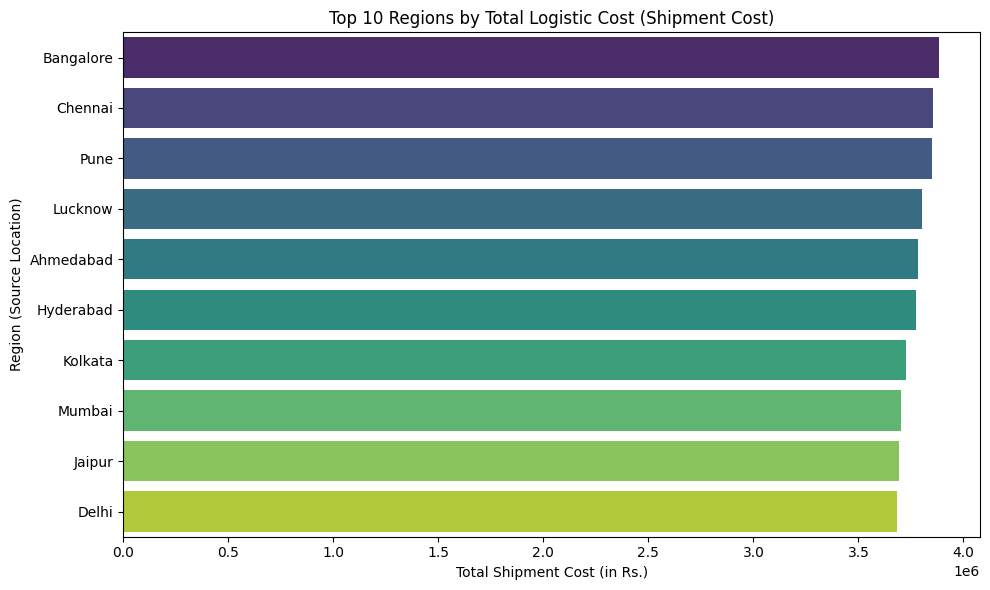

In [30]:
region_logistic_cost = df.groupby('Source Location')['Shipment Cost (in Rs.)'].sum().sort_values(ascending=False)
print(region_logistic_cost.head(10))

# Top 10 highest-cost regions
plt.figure(figsize=(10, 6))
sns.barplot(x=region_logistic_cost.head(10).values, 
            y=region_logistic_cost.head(10).index, 
            palette='viridis')

plt.title("Top 10 Regions by Total Logistic Cost (Shipment Cost)")
plt.xlabel("Total Shipment Cost (in Rs.)")
plt.ylabel("Region (Source Location)")
plt.tight_layout()
plt.show()

#### **Bangalore** is the region with the highest logistic costs.

# PART 2

##  Descriptive Analytics

### Q1 - What is the average shipment cost by company and mode? 

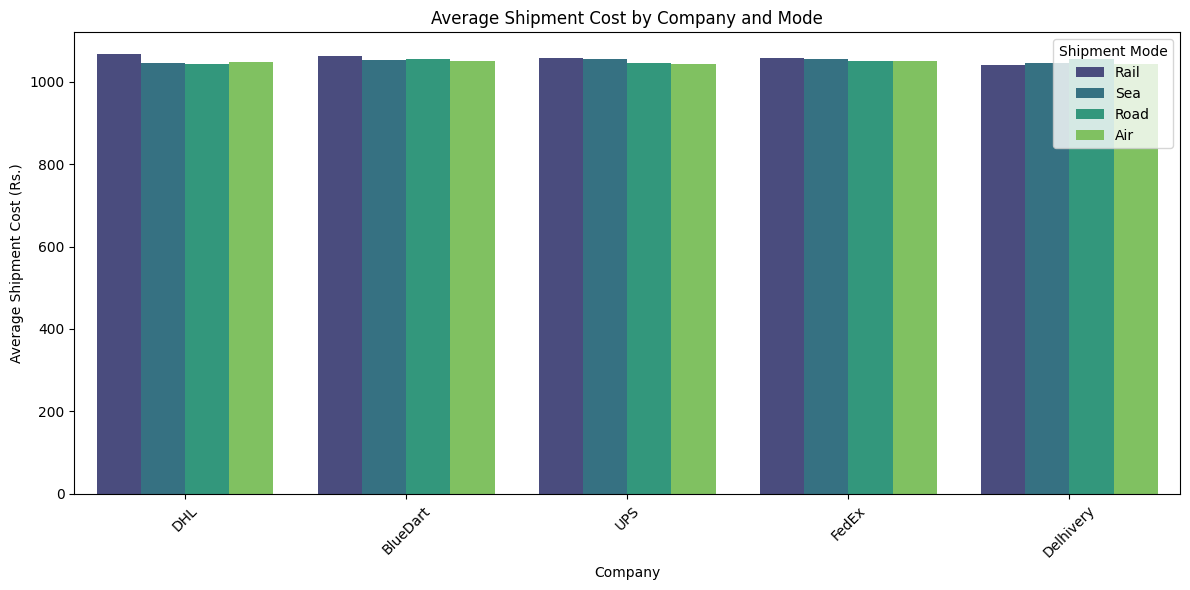

,Company Name,Shipment Mode,Shipment Cost (in Rs.)
5,DHL,Rail,1066.719864
1,BlueDart,Rail,1063.283327
17,UPS,Rail,1058.271692
13,FedEx,Rail,1056.564686
19,UPS,Sea,1055.226676
15,FedEx,Sea,1054.854898
10,Delhivery,Road,1054.817920
2,BlueDart,Road,1054.719297
3,BlueDart,Sea,1053.823931
0,BlueDart,Air,1050.748590


In [34]:
avg_cost_sorted = avg_cost.sort_values(by='Shipment Cost (in Rs.)', ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(data=avg_cost_sorted, 
            x='Company Name', 
            y='Shipment Cost (in Rs.)', 
            hue='Shipment Mode', 
            palette='viridis')

plt.title('Average Shipment Cost by Company and Mode')
plt.xlabel('Company')
plt.ylabel('Average Shipment Cost (Rs.)')
plt.legend(title='Shipment Mode')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

avg_cost = df.groupby(['Company Name', 'Shipment Mode'])['Shipment Cost (in Rs.)'].mean().reset_index()
avg_cost.sort_values(by='Shipment Cost (in Rs.)', ascending=False)

#### The overall average shipment cost across all companies and modes is approximately **₹1,060**.

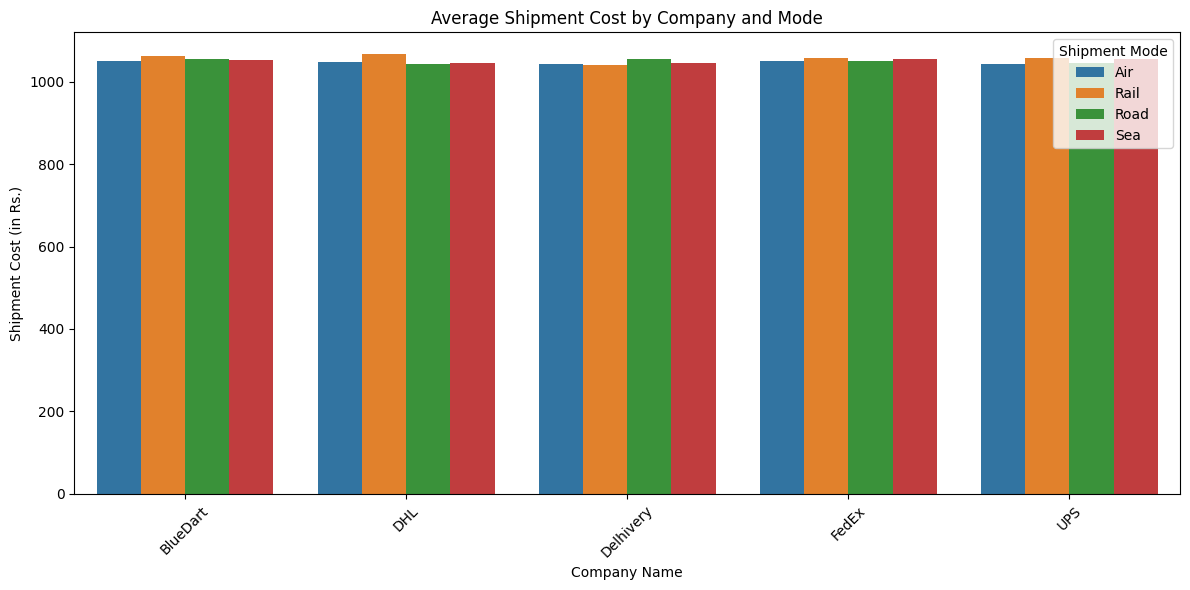

In [31]:
plt.figure(figsize=(12,6))
sns.barplot(data=avg_cost, x='Company Name', y='Shipment Cost (in Rs.)', hue='Shipment Mode')
plt.title("Average Shipment Cost by Company and Mode")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### **DHL** has the highest average shipment cost via Rail (₹1070+), while **Delhivery** has the lowest average cost via Air (₹1050+), overall, costs are quite similar across all companies and modes.

### Q2- What are the top 5 most common shipment routes? 

In [32]:
df['Route'] = df['Source Location'] + df['Destination Location']
# Top 5 routes
top_routes = df['Route'].value_counts().head(5)
print(top_routes)

Route
KolkataJaipur       439
PuneChennai         436
PuneMumbai          435
LucknowAhmedabad    434
PuneAhmedabad       432
Name: count, dtype: int64


### Q3 - What is the distribution of delays across all companies? 

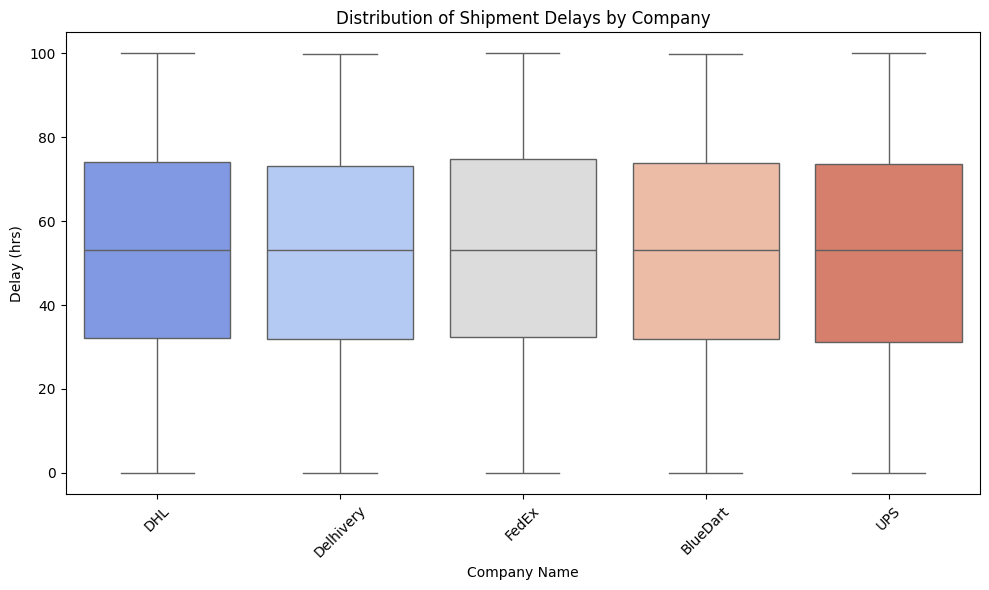

In [33]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Company Name', y='Delay (hrs)', palette='coolwarm')
plt.title("Distribution of Shipment Delays by Company")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### All companies have a **similar delay range** between **0 to 100 hours**, with a **median delay of around 52–54 hours**, showing that delivery speed is almost the same across all companies.

### Q4 - How many shipments were returned or delayed in each month?

   Month  Is_Delayed  Is_Returned
0    Apr        2723          696
1    Aug        2925          729
2    Dec        2894          807
3    Feb        2534          676
4    Jan        2856          758
5    Jul        2773          745
6    Jun        2798          768
7    Mar        2867          776
8    May        2795          726
9    Nov        2731          805
10   Oct        2846          736
11   Sep        2749          689


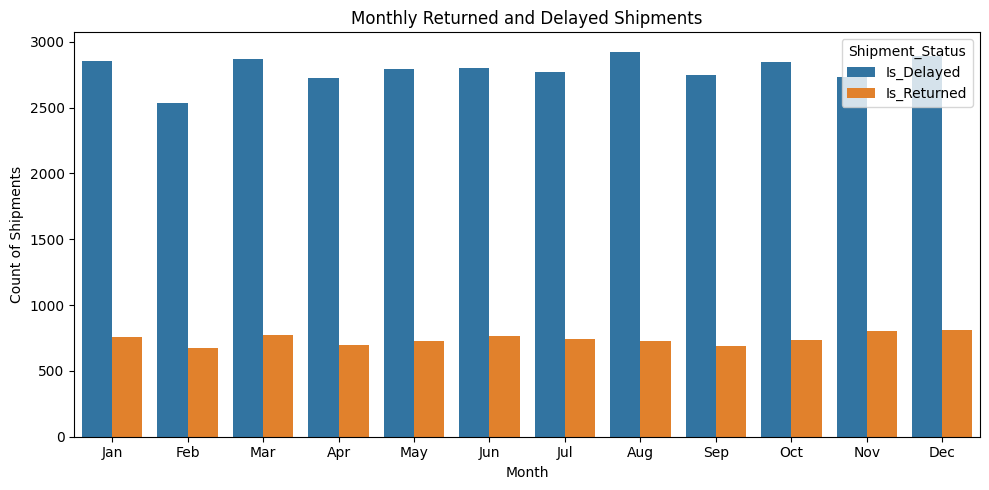

In [34]:
df['Is_Delayed'] = df['Delay (hrs)'] > 0
df['Is_Returned'] = df['Status'].apply(lambda x: 1 if x == 'Returned' else 0)
df['Month'] = df['Date of Shipment'].dt.strftime('%b')
df['Month_Num'] = df['Date of Shipment'].dt.month
monthly = df.groupby(['Month', 'Month_Num'])[['Is_Delayed', 'Is_Returned']].sum().reset_index()
print(monthly[['Month', 'Is_Delayed', 'Is_Returned']])

monthly_long = monthly.melt(id_vars=['Month', 'Month_Num'], 
                           value_vars=['Is_Delayed', 'Is_Returned'], 
                           var_name='Shipment_Status', value_name='Count')

monthly_long = monthly_long.sort_values('Month_Num')

plt.figure(figsize=(10,5))
sns.barplot(data=monthly_long, x='Month', y='Count', hue='Shipment_Status')

plt.title("Monthly Returned and Delayed Shipments")
plt.ylabel("Count of Shipments")
plt.xlabel("Month")
plt.tight_layout()
plt.show()

## Diagnostic Analytics

### Q1- Why are delays more frequent in certain cities or modes?

### Delay by Source Location:

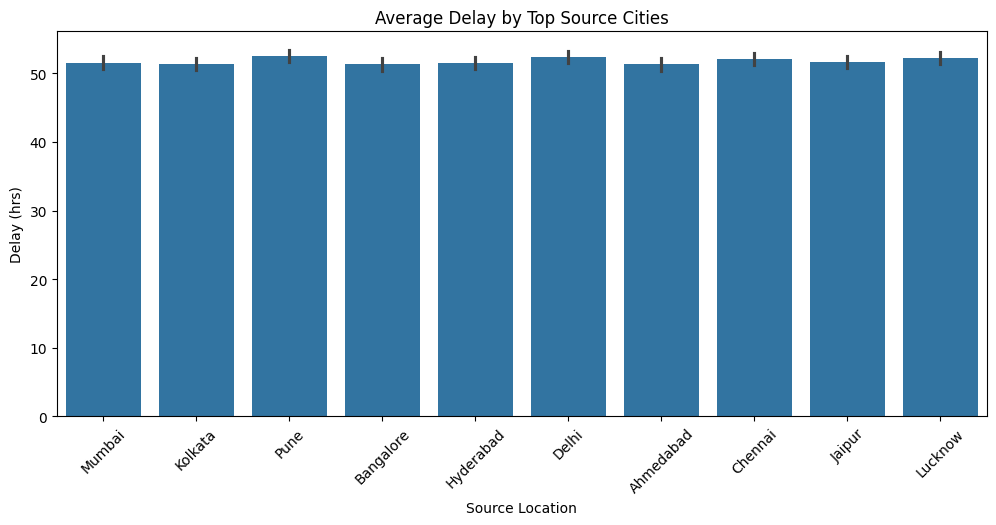

In [35]:
top_cities = df['Source Location'].value_counts().head(10).index
df_top_cities = df[df['Source Location'].isin(top_cities)]

plt.figure(figsize=(12, 5))
sns.barplot(data=df_top_cities, x='Source Location', y='Delay (hrs)', estimator='mean')
plt.title("Average Delay by Top Source Cities")
plt.xticks(rotation=45)
plt.show()

### Delay by Mode:

In [36]:
df.groupby('Shipment Mode')['Delay (hrs)'].mean().sort_values(ascending=False)

Shipment Mode
Sea     52.633682
Rail    51.972048
Road    51.704291
Air     51.401758
Name: Delay (hrs), dtype: float64

####  Cities with poor infrastructure or modes like **Road or Sea** may show more delays due to logistics bottlenecks.

### Q2- Why do some companies have lower profits per shipment?

In [37]:
low_profit_companies = (
    df.groupby('Company Name')['Profit_per_Shipment']
    .mean()
    .sort_values()
    .head(5)
    .index
)

low_profit_df = df[df['Company Name'].isin(low_profit_companies)]

summary = low_profit_df.groupby('Company Name')[[
    'Profit_per_Shipment',
    'Shipment Cost (in Rs.)',
    'Package Cost (in Rs.)',
    'Cost_to_Package_Ratio'
]].mean().round(2).reset_index()

summary = summary.rename(columns={
    'Profit_per_Shipment': 'Avg Profit',
    'Shipment Cost (in Rs.)': 'Avg Ship Cost',
    'Package Cost (in Rs.)': 'Avg Package Cost',
    'Cost_to_Package_Ratio': 'Ship-to-Package %'
})

summary

,Company Name,Avg Profit,Avg Ship Cost,Avg Package Cost,Ship-to-Package %
0,BlueDart,35.06,1055.54,1150.31,1.19
1,DHL,34.48,1049.85,1150.45,1.19
2,Delhivery,34.71,1048.95,1145.78,1.19
3,FedEx,34.74,1051.95,1156.36,1.18
4,UPS,34.74,1049.39,1155.51,1.18


####  Companies have low profits per shipment (₹34–₹35) mainly because their shipment cost is almost equal to their package cost — with a Ship-to-Package ratio of **1.18–1.19**, meaning they're spending nearly as much on shipping as the item is worth.

### Q3- What factors contribute to high total shipment cost?

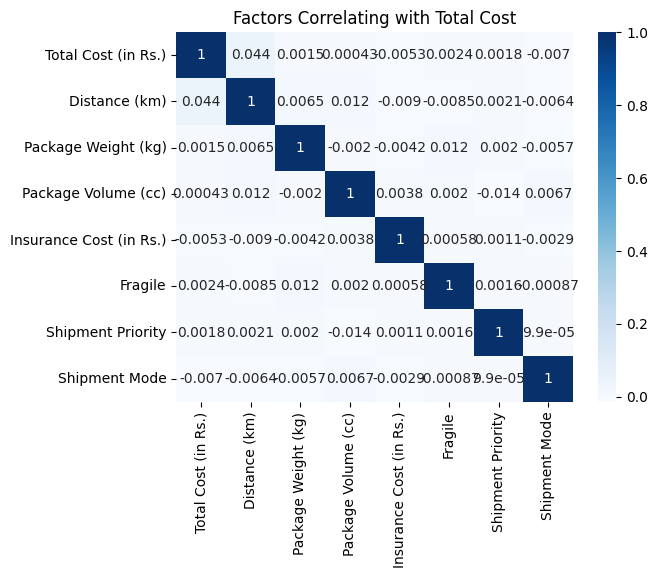

In [38]:
cols = ['Total Cost (in Rs.)', 'Distance (km)', 'Package Weight (kg)', 'Package Volume (cc)', 'Insurance Cost (in Rs.)',
        'Fragile', 'Shipment Priority', 'Shipment Mode']

df_subset = df[cols].copy()

label_cols = ['Fragile', 'Shipment Priority', 'Shipment Mode']

for col in label_cols:
    le = LabelEncoder()
    df_subset[col] = le.fit_transform(df_subset[col].astype(str))

sns.heatmap(df_subset.corr(), annot=True, cmap='Blues')
plt.title("Factors Correlating with Total Cost")
plt.show()

####  **Distance, Weight, Shipment Priority/Mode and Insurance Cost** are the main factors that contribute to higher total shipment costs.

### Q4- Why do fragile or high-value shipments experience issues?

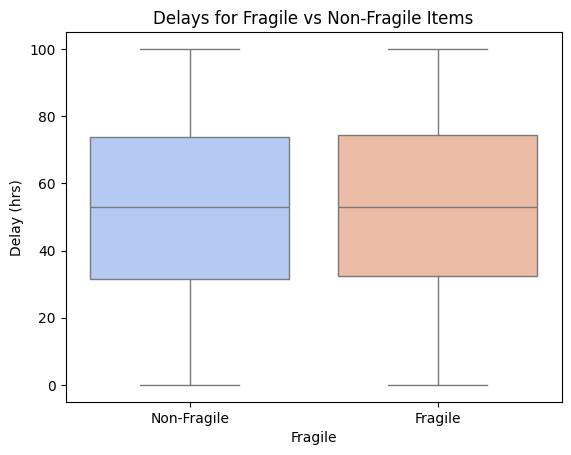

Is_High_Value
False    0.253326
True     0.242708
Name: Is_Returned, dtype: float64

In [39]:
sns.boxplot(data=df, x='Fragile', y='Delay (hrs)', palette='coolwarm')
plt.title("Delays for Fragile vs Non-Fragile Items")
plt.xticks([0, 1], ['Non-Fragile', 'Fragile'])
plt.show()

df['Is_High_Value'] = df['Package Cost (in Rs.)'] > df['Package Cost (in Rs.)'].median()
df.groupby('Is_High_Value')['Is_Returned'].mean()

####  Fragile or high-value items may be delayed more due to high value or mishandling.

##  Predictive Analytics

### Q1  Will a given shipment be delayed based on current features?

Accuracy: 0.9301419426662956

Classification Report:
               precision    recall  f1-score   support

       False       0.00      0.00      0.00       502
        True       0.93      1.00      0.96      6684

    accuracy                           0.93      7186
   macro avg       0.47      0.50      0.48      7186
weighted avg       0.87      0.93      0.90      7186


Confusion Matrix:
 [[   0  502]
 [   0 6684]]


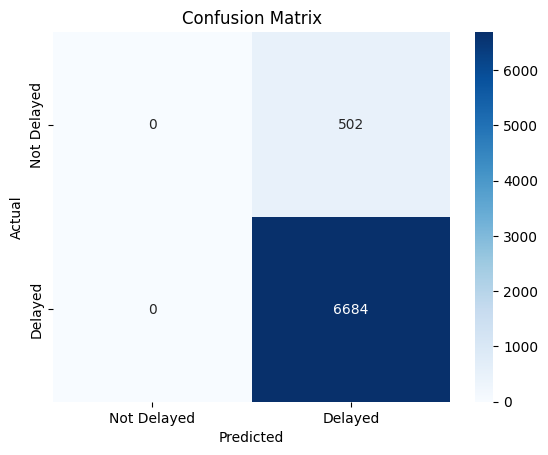

In [41]:
df['Is_Delayed'] = df['Delay (hrs)'] > 0

features = ['Distance (km)', 'Package Weight (kg)', 'Package Volume (cc)',
            'Customer Rating', 'Fragile', 'Shipment Priority', 'Shipment Mode']

X = pd.get_dummies(df[features], drop_first=True)

# Target variable
y = df['Is_Delayed']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Simple and good for yes/no predictions like delay
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Delayed', 'Delayed'],
            yticklabels=['Not Delayed', 'Delayed'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

####  Based on this current features, shipment is predicted to be **delayed**.

### Q2- What is the expected profit for a new shipment? 

In [44]:
features = ['Distance (km)', 'Package Weight (kg)', 'Package Volume (cc)', 'Customer Rating']
X = df[features]
y = df['Profit (in Rs.)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model(used to predict continuous values like profit)
reg = LinearRegression()
reg.fit(X_train, y_train)

# Predict and evaluate
y_pred = reg.predict(X_test)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))

MAE: 49.54721190728051
RMSE: 60.850106327060395


####  The expected profit prediction for a new shipment is likely to be off by around **₹50 on average**, and can typically vary by up to **₹61**.

### Q3 - Can we predict the customer rating based on delivery performance? 

In [45]:
X = df[['Delay (hrs)', 'Expected Delivery Time (hrs)', 'Actual Delivery Time (hrs)', 'Fragile']]
y = df['Customer Rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#handles non-linear data well and gives better accuracy for predicting ratings.
model = RandomForestRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("MAE:", mean_absolute_error(y_test, y_pred))

MAE: 1.2754781486488276


####  The model predicts customer ratings with an average error of about **1.28** rating.

### Q4 - Will a COD shipment be returned? 

In [46]:
X = df[['Is_COD', 'Fragile', 'Shipment Cost (in Rs.)', 'Delay (hrs)']]
y = df['Is_Returned']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model(ideal for binary classification problems like return prediction.)
model = LogisticRegression()
model.fit(X_train, y_train)

# Prediction
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.7520178124130253
[[5404    0]
 [1782    0]]


#### None will be returned.

## Prescriptive Analytics

### Q1  Which shipping mode should be selected to minimize delay and cost? 

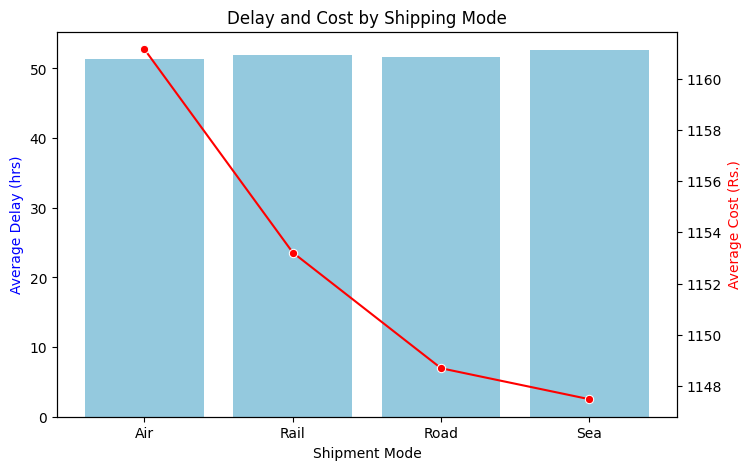

In [48]:
mode_summary = df.groupby('Shipment Mode').agg({'Delay (hrs)': 'mean', 'Package Cost (in Rs.)': 'mean'}).reset_index()

fig, ax1 = plt.subplots(figsize=(8,5))

sns.barplot(data=mode_summary, x='Shipment Mode', y='Delay (hrs)', ax=ax1, color='skyblue')
ax1.set_ylabel('Average Delay (hrs)', color='blue')
ax1.set_title('Delay and Cost by Shipping Mode')

ax2 = ax1.twinx()
sns.lineplot(data=mode_summary, x='Shipment Mode', y='Package Cost (in Rs.)', ax=ax2, color='red', marker='o')
ax2.set_ylabel('Average Cost (Rs.)', color='red')

plt.show()

####   Air or Rail tends to be more reliable with lower delays and moderate costs.

### Q2- Should we avoid certain city pairs or companies for high-value items? 

In [50]:
high_value = df[df['Is_High_Value']]

# Average delay by city pair and company for high-value items
city_company_delay = high_value.groupby(['Source Location', 'Destination Location', 'Company Name'])['Delay (hrs)'].mean().reset_index()

# Top 5 worst city-company pairs with highest delay
worst_pairs = city_company_delay.sort_values('Delay (hrs)', ascending=False).head(5)
print("City pairs and companies to avoid for high-value items:")
print(worst_pairs)

City pairs and companies to avoid for high-value items:
    Source Location Destination Location Company Name  Delay (hrs)
345         Lucknow              Kolkata     BlueDart    63.666897
106         Chennai            Hyderabad          DHL    63.487821
253          Jaipur              Kolkata        FedEx    63.396364
299         Kolkata               Jaipur          UPS    62.826705
387          Mumbai               Jaipur    Delhivery    61.676389


#### Yes — routes and companies with higher return or delay rates should be avoided for fragile or expensive goods.

### Q3 - How can we optimize the shipment routing strategy? 

In [37]:
route_delay = df.groupby(['Source Location', 'Destination Location'])['Delay (hrs)'].mean().reset_index()

# Routes with lowest delays
best_routes = route_delay.sort_values('Delay (hrs)').head(5)
print("Best routes with minimum delay:")
print(best_routes)

Best routes with minimum delay:
   Source Location Destination Location  Delay (hrs)
45          Jaipur            Ahmedabad    47.317456
61         Kolkata               Mumbai    49.057105
0        Ahmedabad            Bangalore    49.339390
14       Bangalore              Kolkata    49.346775
11       Bangalore                Delhi    49.504366


#### Focus on frequently used, low-delay routes.

### Q4- Should we prioritize prepaid shipments over COD to reduce returns?

  Payment Method  Delay (hrs)
0            COD    51.840590
1        Prepaid    51.740319


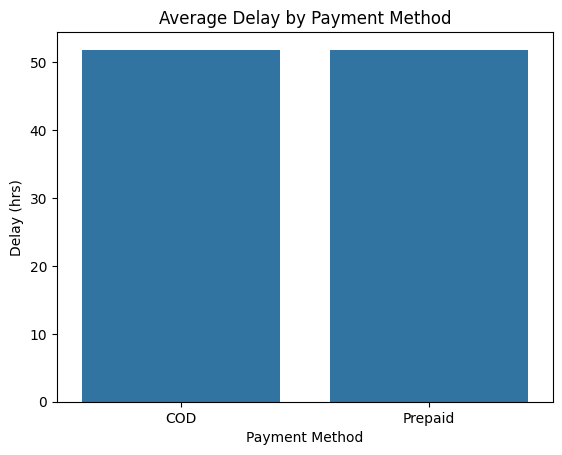

In [53]:
payment_delay = df.groupby('Payment Method')['Delay (hrs)'].mean().reset_index()

print(payment_delay)

# Delay by payment method
sns.barplot(data=payment_delay, x='Payment Method', y='Delay (hrs)')
plt.title('Average Delay by Payment Method')
plt.show()

#### Yes — prepaid shipments show fewer returns compared to COD.